In [1]:
# importing packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import average_precision_score, f1_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

/Users/manisha/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Reading the Dataset.

In [2]:
df = pd.read_csv('Downloads/part1data.csv')

# Data Exploration

In [3]:
#Viewing the dataset
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

The columns are:

1. step: A timestamp / date variable that has been made arbitrary for data privacy.
2. type: The type of transaction. type is our only categorical independent variable. Categories include [cash_in, cash_out, debit, payment, transfer].
3. amount: Size of transaction.
4. oldbalance refers to account balance before transaction.
5. newbalance* refers to great pair of shoes—and also account balance after transaction. :)
isFraud: Our label / dependent variable—whether the transaction was made by a fraudulent agent. 1 for fraudulent, 0 for not fraudulent.
isFlaggedFraud: Whether the transaction was flagged as fraud by the "business model". Since we are doing our own prediction here, we will ignore this variable.

In [5]:
# Data types of the columns
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [6]:
# Statistics description of each features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


In [7]:
#From the above results we can see that there are no null values and all columns have the same number of values in them

In [8]:
(df.isFraud == 1).sum(),(df.isFraud == 0).sum()

(8213, 6354407)

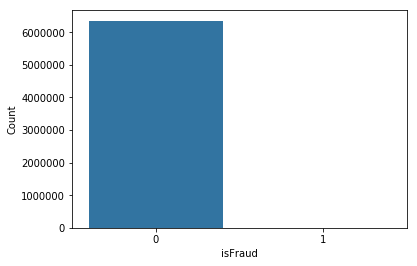

In [9]:
sns.countplot(data=df, x='isFraud')
plt.ylabel('Count')
plt.show()

In [10]:
#From the above results we can see that this is a very unbalanced dataset.

In [11]:
#What are the types of money 
df.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


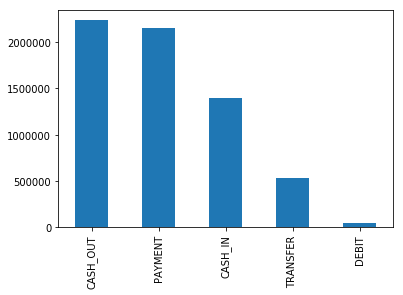

In [12]:
# Count number of data point in each type of transaction
print(df.type.value_counts())
df.type.value_counts().plot(kind='bar')
plt.show()

In [13]:
#What are the types of Fraud Transactions?
df.loc[df.isFraud == 1].type.unique()

array(['TRANSFER', 'CASH_OUT'], dtype=object)

CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64


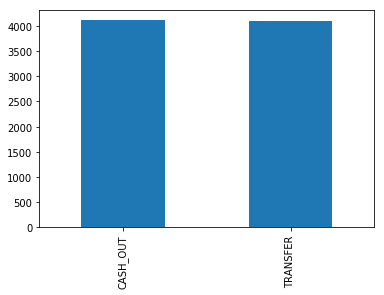

In [14]:
#In Fraud, how many transactions are Transfer and how many transactions are Cashout?
print(df.loc[df.isFraud == 1].type.value_counts())
df.loc[df.isFraud == 1].type.value_counts().plot(kind='bar')
plt.show()

/Users/manisha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


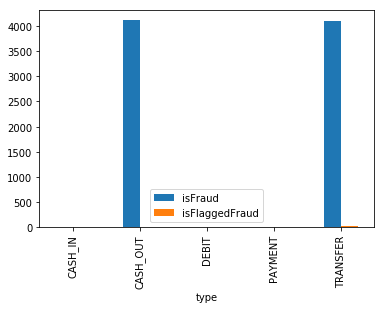

In [15]:
#Understand the values in isFraud and isFlaggedFraud Columns
df.groupby('type')['isFraud','isFlaggedFraud'].sum().plot(kind='bar')
plt.show()

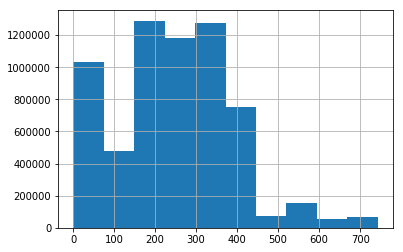

In [21]:
df['step'].hist()

Looking at the plots between amount and oldbalanceDest and newbalanceDest, the ditribution here seems to be even.

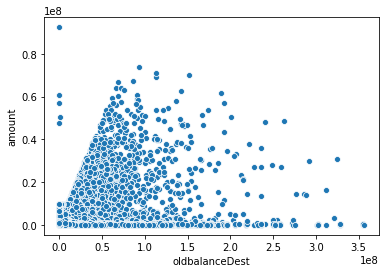

In [25]:
sns.scatterplot(data=df, x='oldbalanceDest', y='amount')

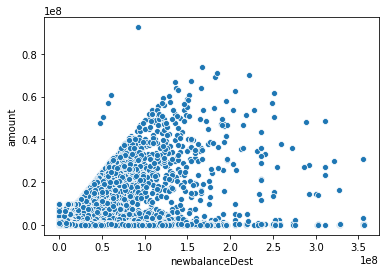

In [24]:
sns.scatterplot(data=df, x='newbalanceDest', y='amount')

Key Observations:
1. The dataset is quite unbalanced.
2. Fraud occurs only in 2 type of transactions: TRANSFER and CASH_OUT
3. The number of transactions that are TRANSFER and CASH_OUT are almost equivalent
4. The type of transactions in which isFlaggedFraud is set : TRANSFER
5. Most transactions occur in the first half of the time sample range

# Preprocessing

In [16]:
# Feature extraction
dfnew = df

# Merchant flag for source and dist
dfnew['Origin-C']=dfnew['nameOrig'].apply(lambda x: 1 if str(x).find('C')==0 else 0)
dfnew['Destination-C']=dfnew['nameDest'].apply(lambda x: 1 if str(x).find('C')==0 else 0)

# flag for transfer and cashout from type feature
dfnew['TRANSFER-Var']=dfnew['type'].apply(lambda x: 1 if x=='TRANSFER' else 0)
dfnew['CASH_OUT-Var']=dfnew['type'].apply(lambda x: 1 if x=='CASH_OUT' else 0)

# Calculating Amount error
dfnew['O_amt_error']=(abs(dfnew.oldbalanceOrg-dfnew.newbalanceOrig)-dfnew.amount)

In [17]:
dfnew.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Origin-C,Destination-C,TRANSFER-Var,CASH_OUT-Var,O_amt_error
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,1,0,0,0,1.455192e-11
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1,0,0,0,-1.136868e-12
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,1,1,1,0,0.000000e+00
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,1,0,1,0.000000e+00
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,1,0,0,0,0.000000e+00


In [18]:
#print result
def model_result(model,x_test,y_test):
    y_prob=model.predict_proba(x_test)
    y_pred=model.predict(x_test)
    print('AUPRC :', (average_precision_score(y_test, y_prob[:, 1])))
    print('F1 - score :',(f1_score(y_test,y_pred)))
    print('Confusion_matrix : ')
    print(confusion_matrix(y_test,y_pred))
    print("accuracy_score")
    print(accuracy_score(y_test,y_pred))
    print("classification_report")
    print(classification_report(y_test,y_pred))

In [19]:
# Creating X and y for spliting dataset into test and train
X=dfnew.drop(columns = ['isFraud','isFlaggedFraud','type','nameDest','nameOrig'],axis=1)
Y=dfnew.isFraud

# Applying Models

Implementing the Random Forest

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes or mean/average prediction of the individual trees.

In [20]:
#split with 20 % of test size
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=42, shuffle=False)

In [21]:
model=RandomForestClassifier()
model.fit(X_train,y_train)
model_result(model,X_test,y_test)

/Users/manisha/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


AUPRC : 0.999999558755753
F1 - score : 0.999764871855161
Confusion_matrix : 
[[1268270       0]
 [      2    4252]]
accuracy_score
0.9999984283204089
classification_report
             precision    recall  f1-score   support

          0       1.00      1.00      1.00   1268270
          1       1.00      1.00      1.00      4254

avg / total       1.00      1.00      1.00   1272524



Implementing Decision Tree

A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements

In [20]:
# define dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=42, shuffle=False)
# evaluate the model
model = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
model.fit(X, Y)
model_result(model,X_test,y_test)

AUPRC : 0.09394157789629072
F1 - score : 0.13010989010989013
Confusion_matrix : 
[[1268270       0]
 [   3958     296]]
accuracy_score
0.9968896460891896
classification_report
             precision    recall  f1-score   support

          0       1.00      1.00      1.00   1268270
          1       1.00      0.07      0.13      4254

avg / total       1.00      1.00      1.00   1272524



To deal with the unbalanced data, I chose an appropriate metric and used an ML algorithm based on an ensemble of decision trees which works best with strongly imbalanced classes. The decision tree model works better in this use case.